This will create PNG dataset with these three channels
- R (min-max normalized)
- G (CLAHE)
- B (histogram equalized)

In [47]:
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
from joblib import Parallel,delayed
import subprocess
from tqdm.auto import tqdm
import cv2

import sys
sys.path.append('..')
from src.dicom_utils import *

Read original dicom folders and paths

In [42]:
#train and test folder names 
train_path_list=glob('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/*')
test_path_list= glob('../input/rsna-miccai-brain-tumor-radiogenomic-classification/test/*')
input_path= '../input/'

#list of name of subdirectorys
train_d=list(map(lambda path:path.split('/')[-1],train_path_list))
test_d=list(map(lambda path:path.split('/')[-1],test_path_list))
mpMRI_scans=["FLAIR","T1w","T1wCE","T2w"] 

# list of all dicom iamges paths
train_images_path = glob('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/*/*/*')
test_images_path = glob('../input/rsna-miccai-brain-tumor-radiogenomic-classification/test/*/*/*')
print(len(train_images_path), len(test_images_path))

348641 51473


Create a new rgb directory with identical folder structure

In [11]:
rgb_dir = os.path.join(input_path, 'rgb_png')

def maybe_create_dir(_dir):
    if not os.path.exists(_dir): os.mkdir(_dir)

maybe_create_dir(rgb_dir)

png_test_path = os.path.join(rgb_dir, 'test')
png_train_path = os.path.join(rgb_dir, 'train')
maybe_create_dir(png_test_path)
maybe_create_dir(png_train_path)

for _dir in train_d:
    patient_dir = os.path.join(png_train_path, _dir)
    maybe_create_dir(patient_dir)
    [maybe_create_dir(os.path.join(patient_dir, mpMRI_d)) for mpMRI_d in mpMRI_scans]

for _dir in test_d:
    patient_dir = os.path.join(png_test_path, _dir)
    maybe_create_dir(patient_dir)
    [maybe_create_dir(os.path.join(patient_dir, mpMRI_d)) for mpMRI_d in mpMRI_scans]

Test RGB generation

In [39]:
%%time
dicom_path = "../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/FLAIR/Image-100.dcm"
rgb_array = get_uint8_rgb(dicom_path)

CPU times: user 27.5 ms, sys: 20.7 ms, total: 48.1 ms
Wall time: 19.1 ms


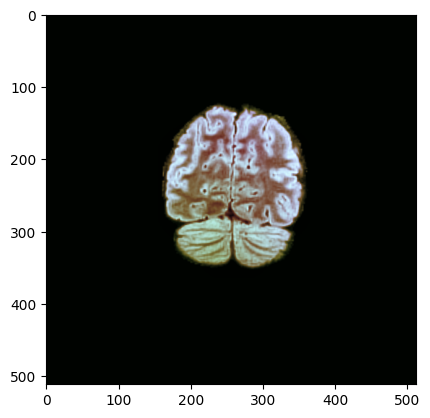

In [40]:
plt.imshow(rgb_array)
plt.show()

## Multiprocess

In [43]:
def save_png(pth, rgb_cohort_dir):
    img = get_uint8_rgb(pth)                                             
    name = pth.split('/')[4:][-1].split('.')[0]                               
    new_path = rgb_cohort_dir + '/' + '/'.join(pth.split('/')[4:-1]) + '/' + name + '.png'    
    cv2.imwrite(new_path, img)

def save_train_png(pth):
    save_png(pth, png_train_path)

def save_test_png(pth):
    save_png(pth, png_test_path)

In [48]:
n_jobs = 8

mp_train = Parallel(
    n_jobs = n_jobs,
    prefer = 'threads')(delayed(save_train_png)(pth) for pth in tqdm(train_images_path, total=len(train_images_path)))

mp_test = Parallel(
    n_jobs = n_jobs,
    prefer = 'threads')(delayed(save_test_png)(pth) for pth in tqdm(test_images_path, total=len(test_images_path)))

  0%|          | 0/348641 [00:00<?, ?it/s]

  0%|          | 0/51473 [00:00<?, ?it/s]